## This Notebook shows the basics of connecting to the event data as well as some basic analysis of the data using the HockeyRink package.

In [308]:
#!pip install hockey-rink

In [323]:
import pandas as pd
import hockey_rink as hr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

##### 1. Read the data

In [310]:
# read in the data
df = pd.read_csv('data/events.csv')


In [311]:
df.head()

,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,EventStartCoordinate,...,StartPlayerDirection3,StartPlayerDirection4,StartPlayerDirection5,StartPlayerDirection6,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12
0,1,0,1708857103760,Faceoff,FullStrength,5v5,True,True,NeutralZone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1708857103760,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-0.1,-0.3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1708857104540,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-3.1,2.2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1708857105420,Pass,FullStrength,5v5,True,True,NeutralZone,"-6,4.7",...,"-0.914,0.406","-0.967,-0.254","-0.053,0.999","0.803,0.597","-0.789,-0.614","-0.379,0.925","-0.67,-0.742","0.09,-0.996","-0.973,0.231","-0.18,0.984"
4,1,1,1708857105440,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-6,4.6",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
# each row has a column EventStartCoordinate and EventEndCoordinate which if applicable, contains the x and y coordinates of the event.
# these columns need to be split into two columns, one for x and one for y
df[['EventStartX', 'EventStartY']] = df['EventStartCoordinate'].str.split(',', expand=True)
df[['EventEndX', 'EventEndY']] = df['EventEndCoordinate'].str.split(',', expand=True)

In [313]:
# convert the columns to numeric
df['EventStartX'] = pd.to_numeric(df['EventStartX'])
df['EventStartY'] = pd.to_numeric(df['EventStartY'])
df['EventEndX'] = pd.to_numeric(df['EventEndX'])
df['EventEndY'] = pd.to_numeric(df['EventEndY'])


In [314]:
df.head()

,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,EventStartCoordinate,...,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY
0,1,0,1708857103760,Faceoff,FullStrength,5v5,True,True,NeutralZone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1708857103760,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-0.1,-0.3",...,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,-0.3,-3.1,2.2
2,1,0,1708857104540,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-3.1,2.2",...,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,2.2,-6.0,4.6
3,1,1,1708857105420,Pass,FullStrength,5v5,True,True,NeutralZone,"-6,4.7",...,"-0.789,-0.614","-0.379,0.925","-0.67,-0.742","0.09,-0.996","-0.973,0.231","-0.18,0.984",-6.0,4.7,-11.4,-4.1
4,1,1,1708857105440,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-6,4.6",...,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,4.6,-11.4,-4.1


##### 2. Some sample plots using HockeyRink

In [315]:
# create a rink object
rink = hr.IIHFRink()


In [316]:
# convert the x and y coordinates to the rink coordinates using the rink.convert method
# the coordinates of the board in the hockey_rink package for the IIHF rink are length 197 and width 98.4
df['RinkX'], df['RinkY'] = rink.convert_xy(df['EventStartX'] * 3.2833 , df['EventStartY']*3.28)


In [317]:
shots = df[df['EventType'] == 'Shot']

In [318]:
crossings = df[df['EventType'] == 'BluelineCrossing']

<AxesSubplot: xlabel='RinkX', ylabel='RinkY'>

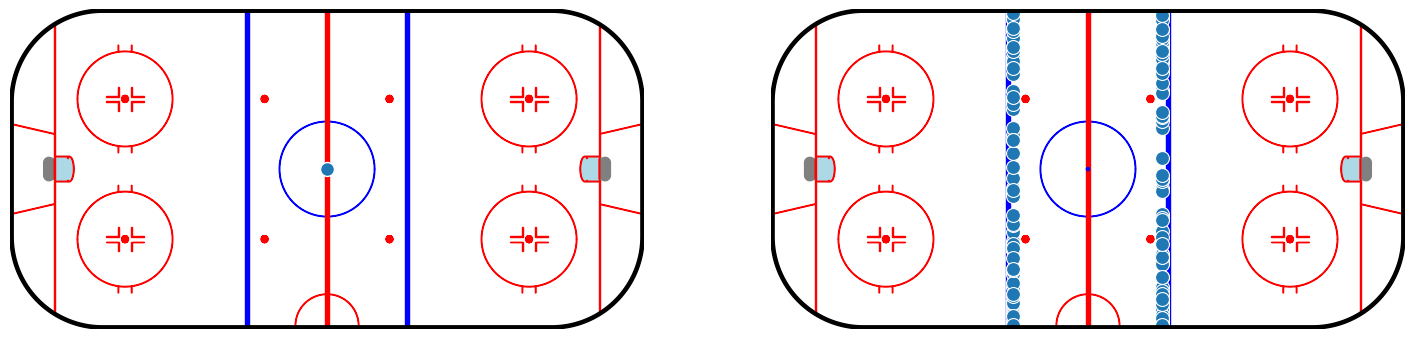

In [319]:
# plot the corssings on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=crossings, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=crossings, ax=axs[1])

<AxesSubplot: xlabel='RinkX', ylabel='RinkY'>

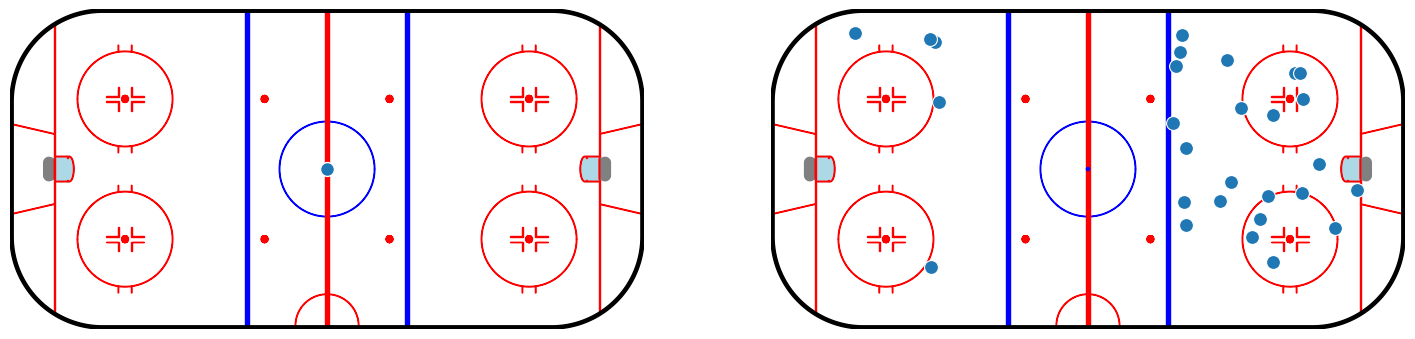

In [320]:
# plot shots on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=shots, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=shots, ax=axs[1])

<AxesSubplot: xlabel='RinkX', ylabel='RinkY'>

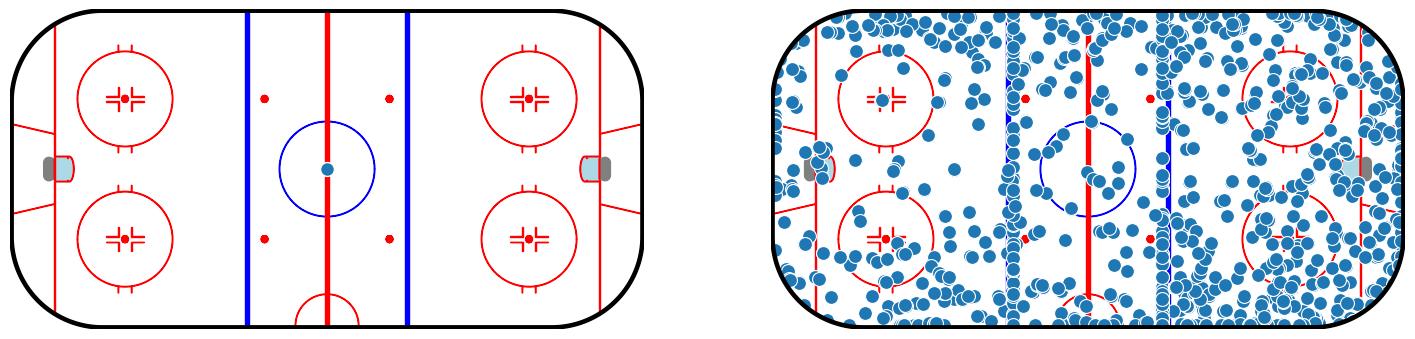

In [321]:
# plot all events on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=df, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=df, ax=axs[1])

<AxesSubplot: xlabel='EventStartX', ylabel='EventStartY'>

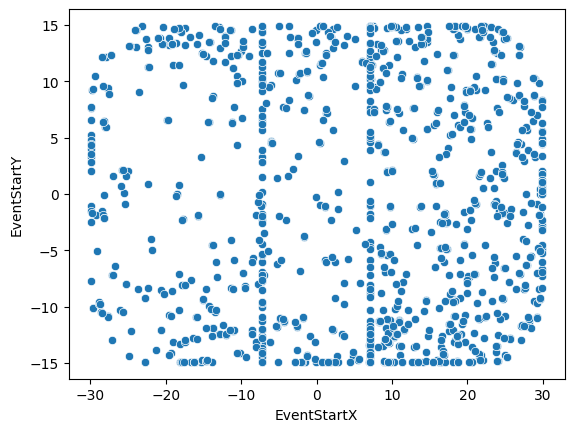

In [322]:
# do a scatterplot of for all events in df
sns.scatterplot(x="EventStartX", y="EventStartY", data=df)
